In [10]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [11]:
url = ("https://raw.githubusercontent.com/rahulhegde99"
      "/Time-Series-Analysis-and-Forecasting-of-Air-Passengers"
        "/master/airpassengers.csv")

data = pd.read_csv(url)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data.shape

(144, 2)

In [13]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
model = Prophet()
model.fit(df)

20:05:28 - cmdstanpy - INFO - Chain [1] start processing
20:05:29 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future_df = model.make_future_dataframe(periods = 12 * 5,
                                     freq='M')

In [19]:
future_df.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [21]:
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower',
		'yhat_upper', 'trend',
		'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,722.664453,694.608133,751.742266,655.842215,649.620356,662.603749
200,1965-08-31,676.247240,647.744023,706.862047,658.959610,652.644239,665.963278
201,1965-09-30,639.431867,607.867392,669.570641,661.976443,655.585147,669.211364
202,1965-10-31,609.386652,579.076860,639.359849,665.093838,658.548904,672.539042
203,1965-11-30,639.042990,609.814132,667.651602,668.110672,661.377471,675.819994


C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


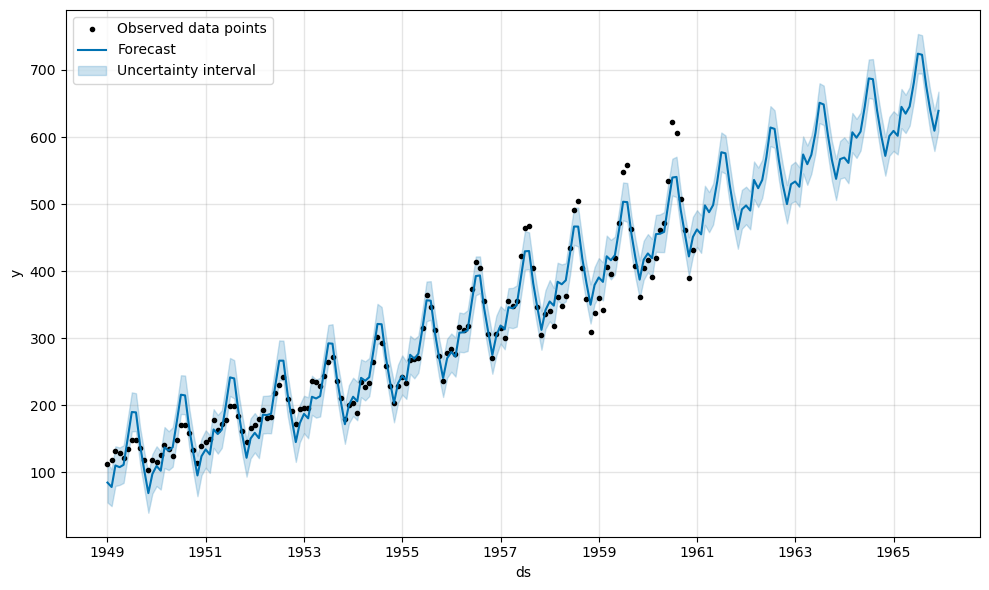

In [22]:
fig1 = model.plot(forecast, include_legend = True)

C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

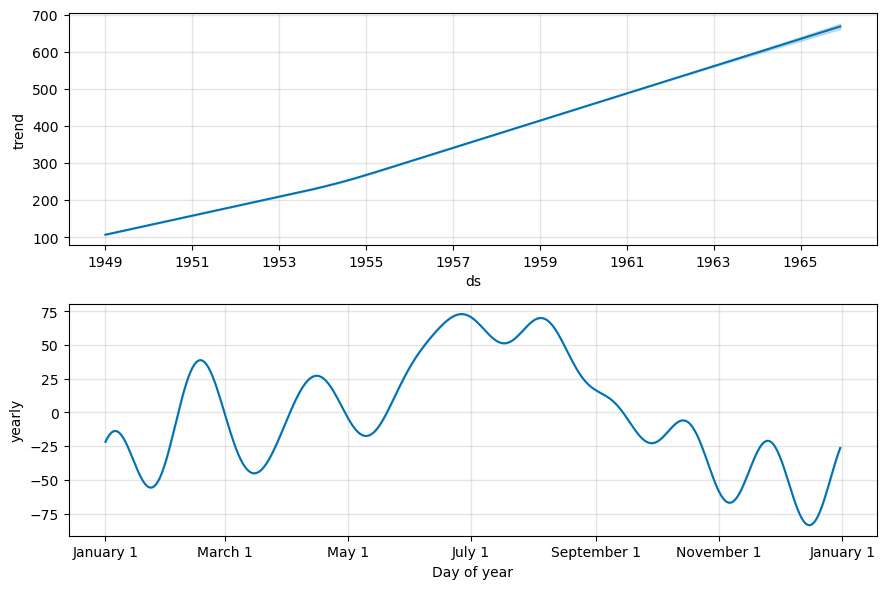

In [23]:
fig2 = model.plot_components(forecast)

C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


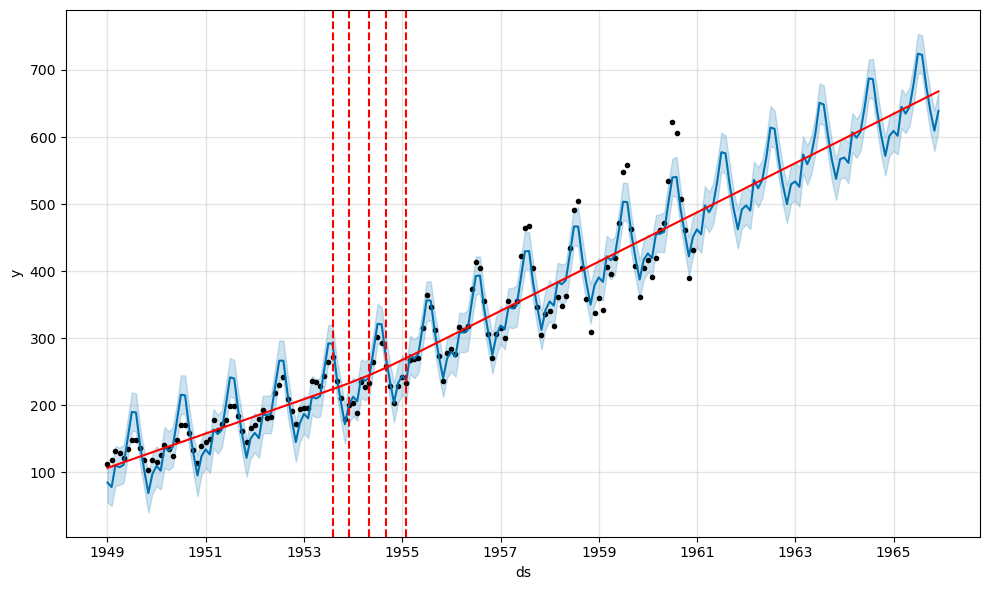

In [24]:
fig3 = model.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(),
                             model,
                             forecast)